In [1]:
#Set seed
import numpy as np
np.random.seed(31415)

In [2]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA as IPCA
import random

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import pandas as pd

import torch

In [3]:
from utils_notebook import load_subset

In [4]:
path_embd_test = '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/embeddings_10/test_samples.csv'
path_embd_enroll =  '/cas/DeepLearn/elperu/tmp/speech_datasets/LibriSpeech/embeddings_10/enroll_samples.csv'

In [5]:
def main(N):
    enroll_DB = pd.read_csv(path_embd_enroll)

    tot_spks = list(enroll_DB['spk_id'].values)

    spks = random.sample(tot_spks, N)

    print(f'Current speakers: {spks}')

    x_enroll, y_enroll = load_subset(path_embd_enroll, spks)
    x_test, y_test = load_subset(path_embd_test, spks)

    # Append the enrollment vectors at the bottom
    X = np.concatenate([x_enroll, x_test], axis=0)
    Y = np.concatenate([y_enroll, y_test], axis=0)

    tsne_out = TSNE(n_components=2, random_state=10, init='pca', verbose=0, perplexity=25).fit_transform(X)


    tmp_color = plt.cm.rainbow(np.linspace(0,1, N))

    # Map colors to labels
    colors = {}
    for s, c in zip(spks, tmp_color):
        colors[s] = c 

    
    # Plot results
    fig, ax = plt.subplots(figsize=(10,10))
    for i in range(tsne_out.shape[0]):

        x_c = tsne_out[i, 0]
        y_c = tsne_out[i, 1]
        lb = Y[i]   # retrive the label

        # First N vetors are enrollment embd
        if i < N:
            ax.scatter(x_c, y_c, marker='X', s=140, color=colors[lb], label=lb,
                       alpha=1.0)
        else:
            ax.scatter(x_c, y_c, marker='*',s=90, color=colors[lb], alpha=.2)



    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Current speakers: [7859, 3235, 1841, 5192, 1898, 4830, 1246, 83, 405, 5808]


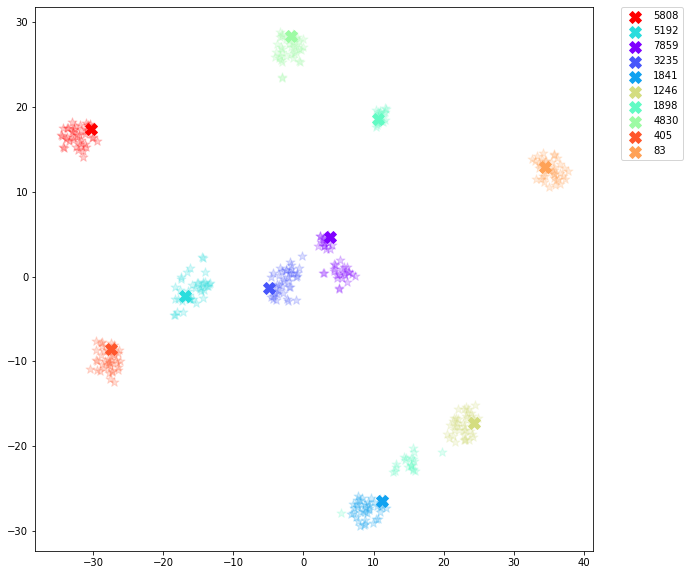

In [6]:
main(10)